In [1]:
import itertools
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import open3d as o3d
import pandas as pd
from scipy import spatial

from utils import estimate_normals, normals_to_rgb
from plotting import set_axes_equal, set_defense_context, draw_unit_cube

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
def add_coordinate_frame(ax):
    """Set RGB coordinate frame to axes.
    
    Parameters
    ----------
    ax : matplotlib.axes._subplots.Axes3DSubplot
        3-D axes subplot.
    
    Returns
    -------
    matplotlib.axes._subplots.Axes3DSubplot
        Axes with coordinate frame.
    """
    ax.quiver(-1.5, -1, -1.5, 0.75, 0, 0, color='r')
    ax.text(0, -1, -1.5, s='$x$', color='r', fontweight='bold')
    ax.quiver(-1.5, -1, -1.5, 0, 0.75, 0, color='g')
    ax.text(-1.5, +0.25, -1.5, s='$y$', color='g', fontweight='bold')
    ax.quiver(-1.5, -1, -1.5, 0, 0, 0.75, color='b')
    ax.text(-1.5, -1, -0.5, s='$z$', color='b', fontweight='bold')
    ax.scatter(-1.5, -1, -1.5, color='k', depthshade=False)
    return ax

In [4]:
# load ear coordinates

xyz = pd.read_csv(os.path.join('data', 'ear.xyz')).values * 100  # in cm
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

In [5]:
# estimate normals manually

pcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamKNN(knn=30),
    fast_normal_computation=True
)
pcd.normalize_normals()
pcd.orient_normals_consistent_tangent_plane(k=30)
n = np.asarray(pcd.normals)

In [6]:
# downsampling

pcd_ds = pcd.voxel_down_sample(voxel_size=0.05)
xyz_ds = np.asarray(pcd_ds.points)
n_ds = np.asarray(pcd_ds.normals)

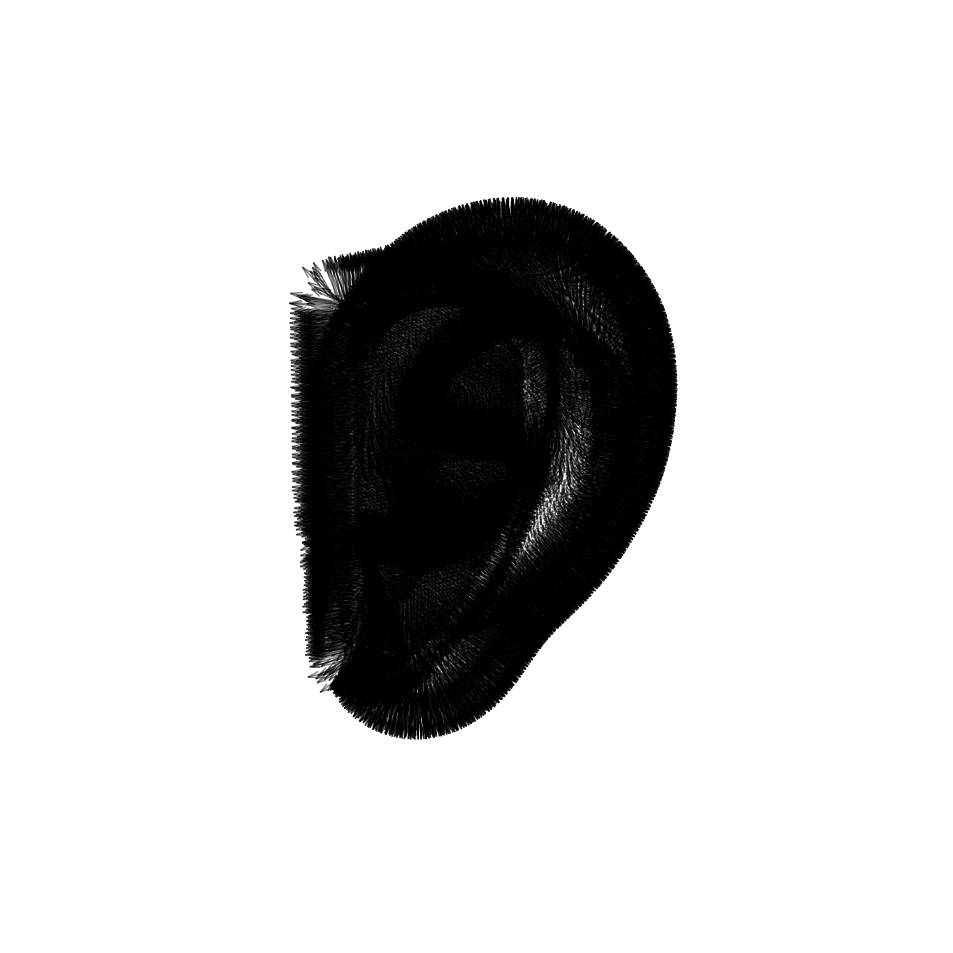

In [7]:
with set_defense_context():
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes(projection ='3d')
    ax.scatter(*xyz_ds.T, c='k', alpha=0.1, s=0.1)
    ax.quiver(*xyz_ds.T, *n_ds.T, color='k',
              length=0.5, lw=0.5, alpha=0.5)
    ax.view_init(20, 150)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

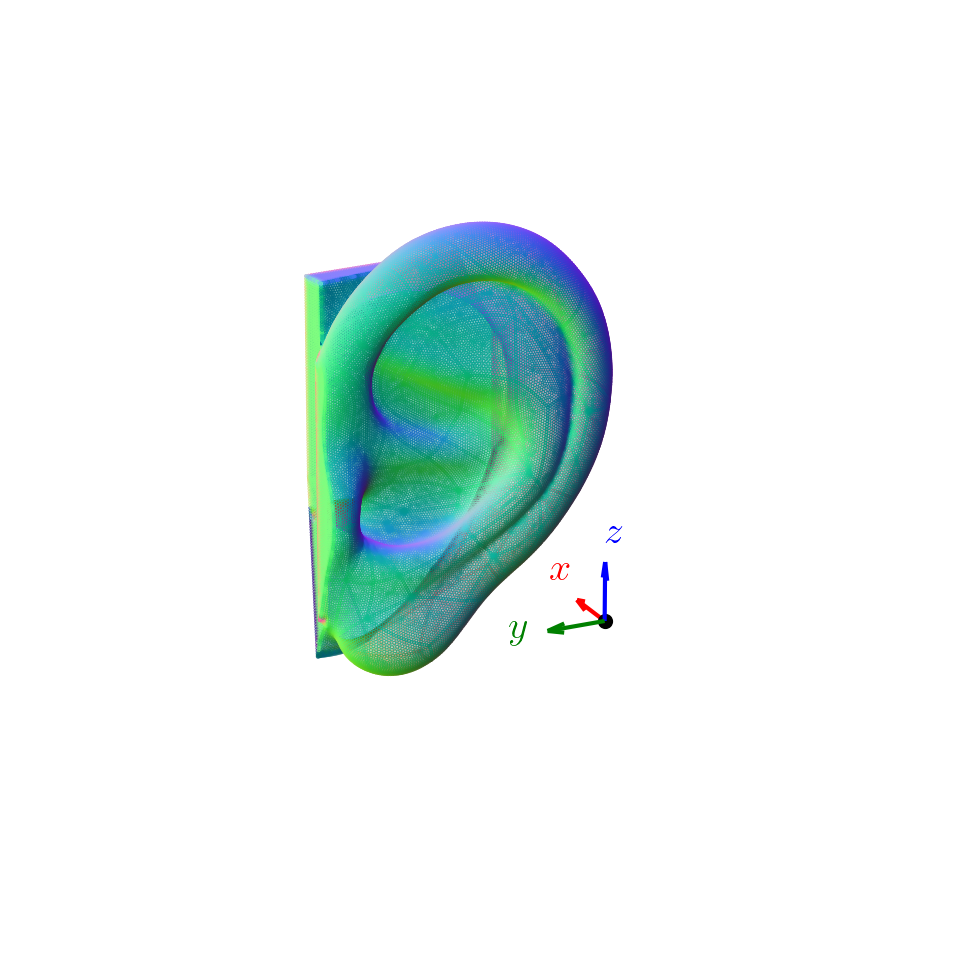

In [8]:
# convert arrows to rgb cube

c = normals_to_rgb(n)

with set_defense_context():
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes(projection ='3d')
    s = ax.scatter(*xyz.T, color=c, s=0.1)
    ax = add_coordinate_frame(ax)
    ax.view_init(20, 155)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

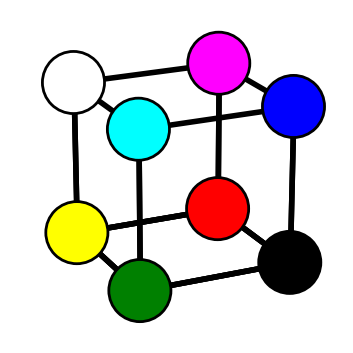

In [9]:
# rgb cube

pts = np.array(list(itertools.product([0, 1], repeat=3)))
cs = ['black', 'blue', 'green', 'cyan', 'red', 'magenta', 'yellow', 'white']
pairs = pd.DataFrame(data=pts, columns=['x', 'y', 'z'])
pairs['cs'] = cs

with set_defense_context():
    fig = plt.figure(figsize=(2, 2))
    ax = plt.axes(projection ='3d')
    ax = draw_unit_cube(ax)
    ax.scatter(*pts.T, c=cs, edgecolor='k', depthshade=False, s=500)
    ax.view_init(20, 155)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()